# Lab 2 Sample Code

## FUNCTION & DATA GENERATE

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    """Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))


def der_sigmoid(y):
    """First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, (x > y).astype(np.int64).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_chessboard(n=100):
        """Data generation (Chessboard)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, ((x < 0.25) ^ (x > 0.5) ^ (x > 0.75) ^ (y < 0.25) ^ (y > 0.5) ^ (y > 0.75)).astype(np.int64).reshape(
            (-1, 1)
        )

    @staticmethod
    def fetch_data(mode, n):
        """Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == "Linear" or mode == "XOR" or mode == "Chessboard"

        data_gen_func = {"Linear": GenData._gen_linear, "XOR": GenData._gen_xor, "Chessboard": GenData._gen_chessboard}[mode]

        return data_gen_func(n)


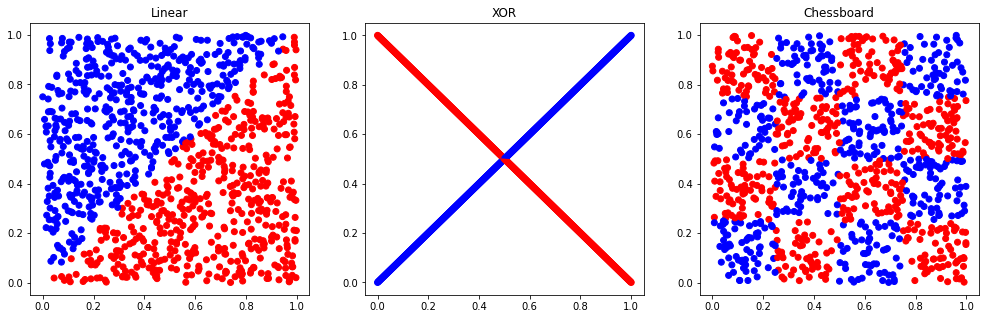

In [ ]:
plt.figure(figsize=(17, 5))
for i, name in enumerate(['Linear', 'XOR', 'Chessboard']):
    data, label = GenData.fetch_data(name, 1000)
    plt.subplot(1,3,i+1)
    plt.scatter(data[:, 0], data[:, 1], c=label[:, 0], cmap=plt.cm.bwr)
    plt.title(name)

## NETWORK ARCHITECTURE

In [ ]:
class Block:
    def __init__(self, in_channel, neurons, learning_rate=1e-2):
        self.learning_rate = learning_rate
        self.weights = np.random.randn(in_channel, neurons)
        self.bias = np.random.randn(1, neurons)

    def forward(self, inputs):
        self.inputs = inputs
        self.Z = np.dot(inputs, self.weights) + self.bias
        self.A = sigmoid(self.Z)
        
        return self.A
    
    def backward(self, dA):
        dZ = np.multiply(der_sigmoid(self.A), dA) # outputerr  
        dw = np.dot(self.inputs.T, dZ) # weighterr
        dA_prev = np.dot(dZ, self.weights.T) # next input

        self.weights = self.weights - self.learning_rate * dw
        self.bias = self.bias - self.learning_rate * dZ

        return dA_prev


In [ ]:
class SimpleNet:
    def __init__(self, num_step=6000, print_interval=100, learning_rate=1e-2):  # don't change print_interval
        """A hand-crafted implementation of simple network.

        Args:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        self.num_step = num_step
        self.print_interval = print_interval
        self.learning_rate = learning_rate
        self.error = 0

        # Model parameters initialization
        # hidden layer 1: 100 nodes
        # hidden layer 2: 50 nodes
        # hidden layer 3: 10 nodes
        # Please initiate your network parameters here.
        self.block1 = Block(2, 100)
        self.block2 = Block(100, 50)
        self.block3 = Block(50, 10)
        self.block4 = Block(10, 1)



    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0] == pred_y.shape[0], f"{data.shape}, {gt_y.shape}, {pred_y.shape}"

        plt.figure(figsize=(11, 5))

        plt.subplot(121)
        plt.title("Ground Truth", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=gt_y[:,0], cmap=plt.cm.bwr)

        plt.subplot(122)
        plt.title("Prediction", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=pred_y[:,0], cmap=plt.cm.bwr)

        plt.show()

    def forward(self, inputs):
        outs = self.block1.forward(inputs)
        outs = self.block2.forward(outs)
        outs = self.block3.forward(outs)
        outs = self.block4.forward(outs)

        return outs


    def backward(self):
        outs = self.block4.backward(self.error)
        outs = self.block3.backward(outs)
        outs = self.block2.backward(outs)
        outs = self.block1.backward(outs)
        

    def train(self, inputs, labels):
        """The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epochs in range(self.num_step):
            for idx in range(n):
                # operation in each training step:
                #   1. forward passing
                #   2. compute loss
                #   3. propagate gradient backward to the front
                self.output = self.forward(inputs[idx : idx + 1, :])
                self.error = self.output - labels[idx : idx + 1, :]

                self.backward()

            if epochs % self.print_interval == 0:
                print("Epochs {}: ".format(epochs), end="")
                self.test(inputs, labels)
                

        print("Training finished")
        self.test(inputs, labels)

    def test(self, inputs, labels):
        """The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx : idx + 1, :])
            error += abs(result - labels[idx : idx + 1, :])

        error /= n

        """ Print or plot your results in your preferred forms"""
        print("accuracy: %.2f" % ((1 - error) * 100) + "%")

## Run "Linear"

Epochs 0: accuracy: 55.43%
Epochs 100: accuracy: 91.76%
Epochs 200: accuracy: 94.89%
Epochs 300: accuracy: 96.16%
Epochs 400: accuracy: 96.87%
Epochs 500: accuracy: 97.34%
Epochs 600: accuracy: 97.67%
Epochs 700: accuracy: 97.92%
Epochs 800: accuracy: 98.12%
Epochs 900: accuracy: 98.28%
Epochs 1000: accuracy: 98.42%
Epochs 1100: accuracy: 98.53%
Epochs 1200: accuracy: 98.63%
Epochs 1300: accuracy: 98.71%
Epochs 1400: accuracy: 98.79%
Epochs 1500: accuracy: 98.85%
Epochs 1600: accuracy: 98.91%
Epochs 1700: accuracy: 98.96%
Epochs 1800: accuracy: 99.01%
Epochs 1900: accuracy: 99.05%
Training finished
accuracy: 99.08%


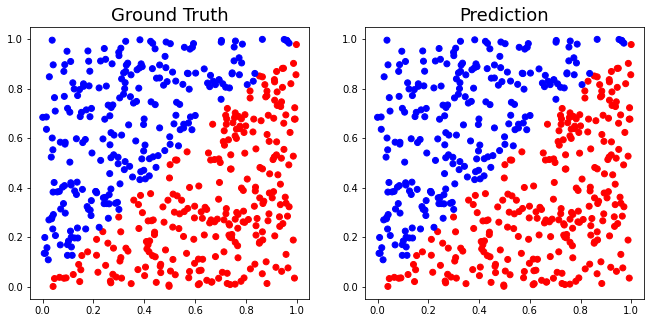

In [ ]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Linear", 500)

net = SimpleNet(2000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

## Run "XOR"

Epochs 0: accuracy: 50.14%
Epochs 100: accuracy: 79.57%
Epochs 200: accuracy: 87.47%
Epochs 300: accuracy: 90.36%
Epochs 400: accuracy: 91.94%
Epochs 500: accuracy: 92.97%
Epochs 600: accuracy: 93.71%
Epochs 700: accuracy: 94.27%
Epochs 800: accuracy: 94.71%
Epochs 900: accuracy: 95.07%
Epochs 1000: accuracy: 95.36%
Epochs 1100: accuracy: 95.61%
Epochs 1200: accuracy: 95.83%
Epochs 1300: accuracy: 96.01%
Epochs 1400: accuracy: 96.18%
Epochs 1500: accuracy: 96.32%
Epochs 1600: accuracy: 96.45%
Epochs 1700: accuracy: 96.57%
Epochs 1800: accuracy: 96.68%
Epochs 1900: accuracy: 96.78%
Training finished
accuracy: 96.87%


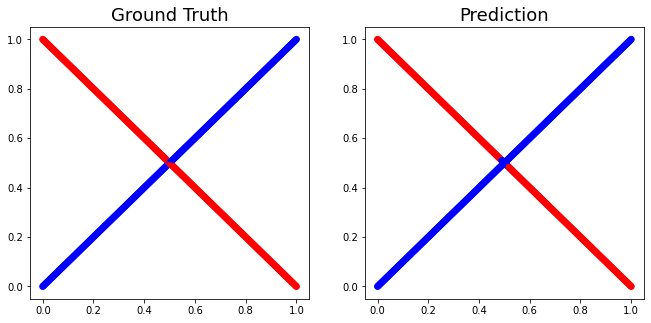

In [ ]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("XOR", 500)

net = SimpleNet(2000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

## Run "Chessboard"

Epochs 0: accuracy: 50.47%
Epochs 100: accuracy: 51.49%
Epochs 200: accuracy: 51.81%
Epochs 300: accuracy: 52.07%
Epochs 400: accuracy: 52.43%
Epochs 500: accuracy: 52.89%
Epochs 600: accuracy: 53.53%
Epochs 700: accuracy: 54.55%
Epochs 800: accuracy: 55.85%
Epochs 900: accuracy: 57.50%
Epochs 1000: accuracy: 59.99%
Epochs 1100: accuracy: 67.74%
Epochs 1200: accuracy: 71.16%
Epochs 1300: accuracy: 72.90%
Epochs 1400: accuracy: 74.21%
Epochs 1500: accuracy: 75.44%
Epochs 1600: accuracy: 76.95%
Epochs 1700: accuracy: 78.84%
Epochs 1800: accuracy: 81.37%
Epochs 1900: accuracy: 85.34%
Epochs 2000: accuracy: 87.69%
Epochs 2100: accuracy: 89.03%
Epochs 2200: accuracy: 89.97%
Epochs 2300: accuracy: 90.68%
Epochs 2400: accuracy: 91.25%
Epochs 2500: accuracy: 91.72%
Epochs 2600: accuracy: 92.11%
Epochs 2700: accuracy: 92.44%
Epochs 2800: accuracy: 92.72%
Epochs 2900: accuracy: 92.97%
Training finished
accuracy: 93.18%


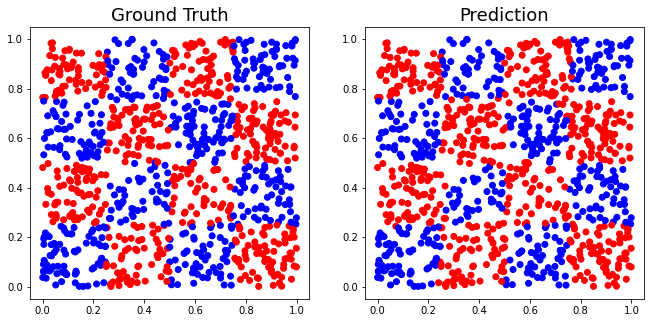

In [ ]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Chessboard", 1000)

net = SimpleNet(3000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)